In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
winner = pd.read_csv('/work/winner_cards.csv')
wins = pd.read_csv('/work/win_magnitude.csv')
wins["Wins"] = wins.iloc[:, 0]
wins = wins[["Wins"]]
win_data = pd.concat([winner, wins], axis=1)
import gc
del winner
del wins
gc.collect()

0

# Visualization and Exploration

Here, we need to know if we are even able to create a predictor based solely on the cards. Does a player's choice in deck have a significant impact on the game? Would a machine learning model even be able to predict the ideal counter deck based on this information?

# Winner Card Correlations

Here, we want to explore and see what kinds of cards are most correlated with winning. Among winning decks, which cards are the most popular and useful? 

# Winner Card Popularity

First, let's see what the most popular cards are among the winners.

<BarContainer object of 20 artists>

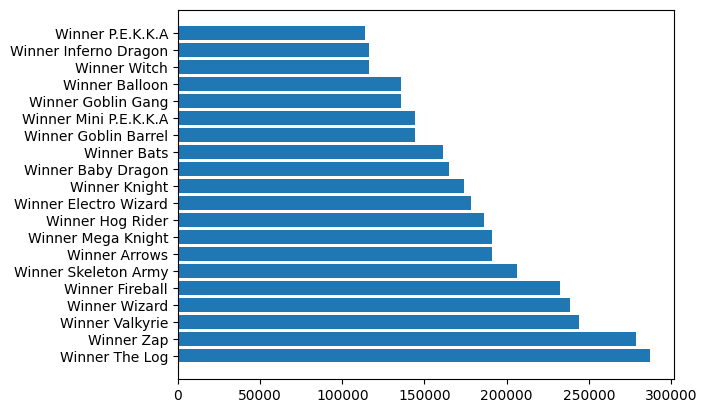

In [ ]:
counts = win_data.sum().sort_values(ascending = False)
popular = counts[1:21]
plt.barh(popular.index, popular.values)

The most popular cards seem to be spells, followed by tanks and area damage cards. Mostly, they seem to be cards with high damage that can be rapidly deployed.

# Winner Card Correlations

Now to see what cards are the most useful in winning decks. For this, we will check the correlation of each card with the win magnitude feature we created earlier.

In [ ]:
win_corr = win_data.corr()

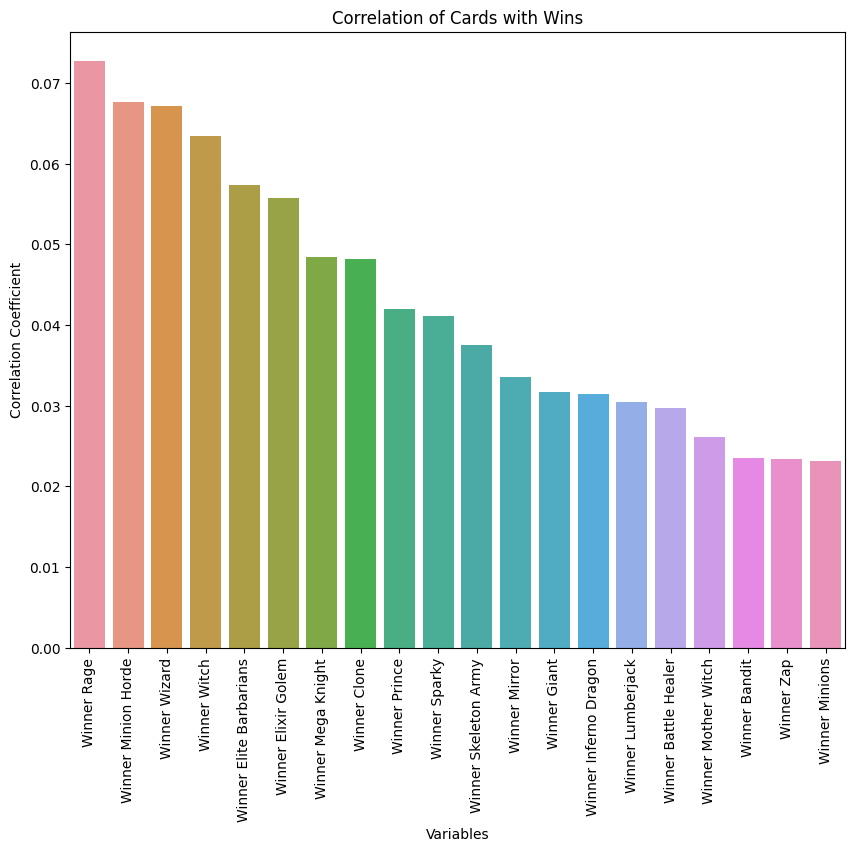

In [ ]:
variable_of_interest = 'Wins'
correlations = win_corr[variable_of_interest]
correlations_sorted = correlations.sort_values(ascending=False)
correlations_sorted = correlations_sorted.drop("Wins", axis = 0)
top = correlations_sorted.iloc[0:20]
plt.figure(figsize=(10, 8))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title(f'Correlation of Cards with {variable_of_interest}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

We can see here that the cards most associated with winning, in the winning decks, are cards that deal a lot of damage at once. Since we're focused on magnitude of victory here, this makes a lot of sense. 

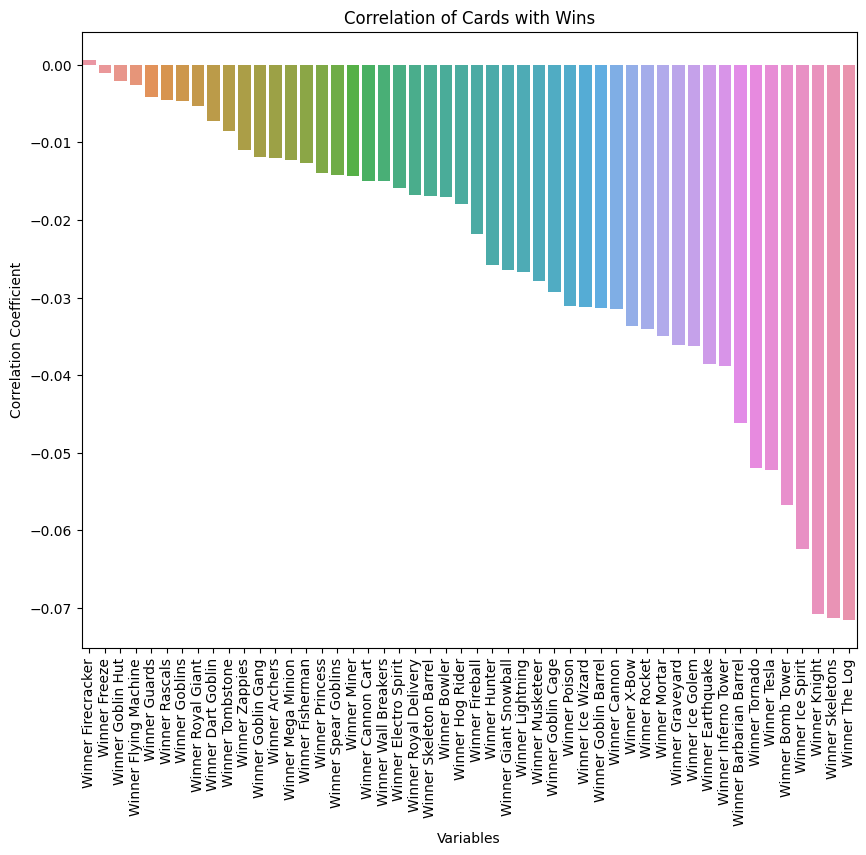

In [ ]:
bottom = correlations_sorted.iloc[-50:]
plt.figure(figsize=(10, 8))
sns.barplot(x=bottom.index, y=bottom.values)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title(f'Correlation of Cards with {variable_of_interest}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

These are the cards that are the least associated with winning within the winning deck. A lot of these cards are pretty low damage and have a lot of counters. These are cards that we might want to stay away from in our predicted decks. 

# Correlated Pairs and Synergies

There are several cards in the game that synergize well with others. Here, we can see some of the synergistic relationships that we might want a model to capture.

In [ ]:
corr_pairs = win_corr.unstack().reset_index()
corr_pairs.columns = ['Card1', 'Card2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Card1'] < corr_pairs['Card2']]
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
sorted_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)
sorted_pairs = sorted_pairs.drop('AbsCorrelation', axis=1)

In [ ]:
sorted_pairs.head(15)

,Card1,Card2,Correlation
975,Winner Golem,Winner Night Witch,0.582729
7351,Winner Cannon,Winner Ice Golem,0.432838
3758,Winner Battle Ram,Winner Royal Ghost,0.387330
4774,Winner Bandit,Winner Battle Ram,0.381003
8010,Winner Tesla,Winner X-Bow,0.380343
8987,Winner Goblin Barrel,Winner Princess,0.376343
3924,Winner Ice Golem,Winner Skeletons,0.366224
6863,Winner Battle Healer,Winner Elixir Golem,0.346234
3800,Winner Battle Ram,Winner Poison,0.345217
3712,Winner Battle Ram,Winner P.E.K.K.A,0.344002


# Loser Card Correlations

In [ ]:
loser = pd.read_csv('/work/loser_cards.csv')
wins = pd.read_csv('/work/win_magnitude.csv')
wins["Wins"] = wins.iloc[:, 0]
wins = wins[["Wins"]]
lose_data = pd.concat([loser, wins], axis=1)
import gc
del loser
del wins
gc.collect()

21239

# Loser Popular Cards

Now, let's see what the most popular cards are among losers.

<BarContainer object of 20 artists>

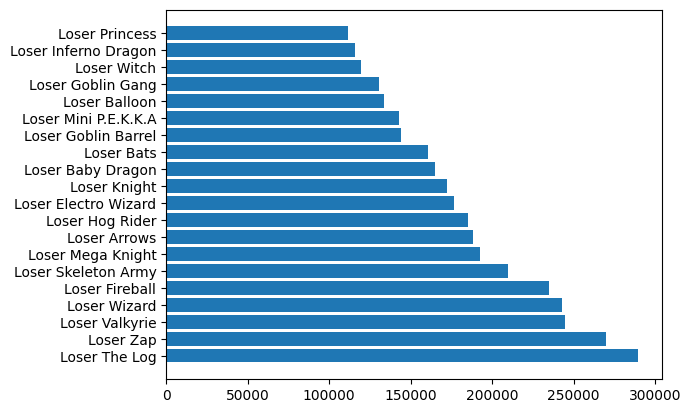

In [ ]:
counts = lose_data.sum().sort_values(ascending = False)
popular = counts[1:21]
plt.barh(popular.index, popular.values)

The top 5 spots are the same as in the winner popular cards, but as cards get less and less usage, the card choices between losers and winners differ dramatically. This could indicate that we're on the right track with using only cards to predict winning decks.

# Loser Card Correlations

Now, we can see which cards are most correlated with the win magnitude feature among the losing decks. This equates to the cards which are most associated with losing.

In [ ]:
lose_corr = lose_data.corr()

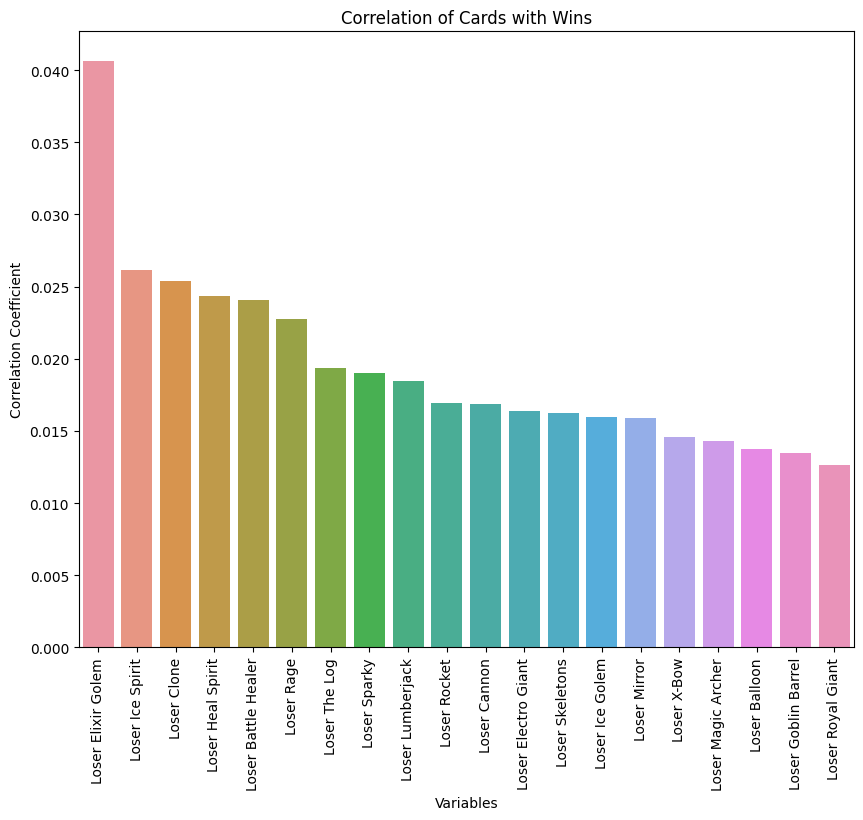

In [ ]:
variable_of_interest = 'Wins'
correlations = lose_corr[variable_of_interest]
correlations_sorted = correlations.sort_values(ascending=False)
correlations_sorted = correlations_sorted.drop("Wins", axis = 0)
top_lose = correlations_sorted.iloc[0:20]
plt.figure(figsize=(10, 8))
sns.barplot(x=top_lose.index, y=top_lose.values)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title(f'Correlation of Cards with {variable_of_interest}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

We can see here that the top cards are very different from the winner deck cards most correlated with wins. This indicates that we are able to focus on the cards when trying to predict a winning deck.

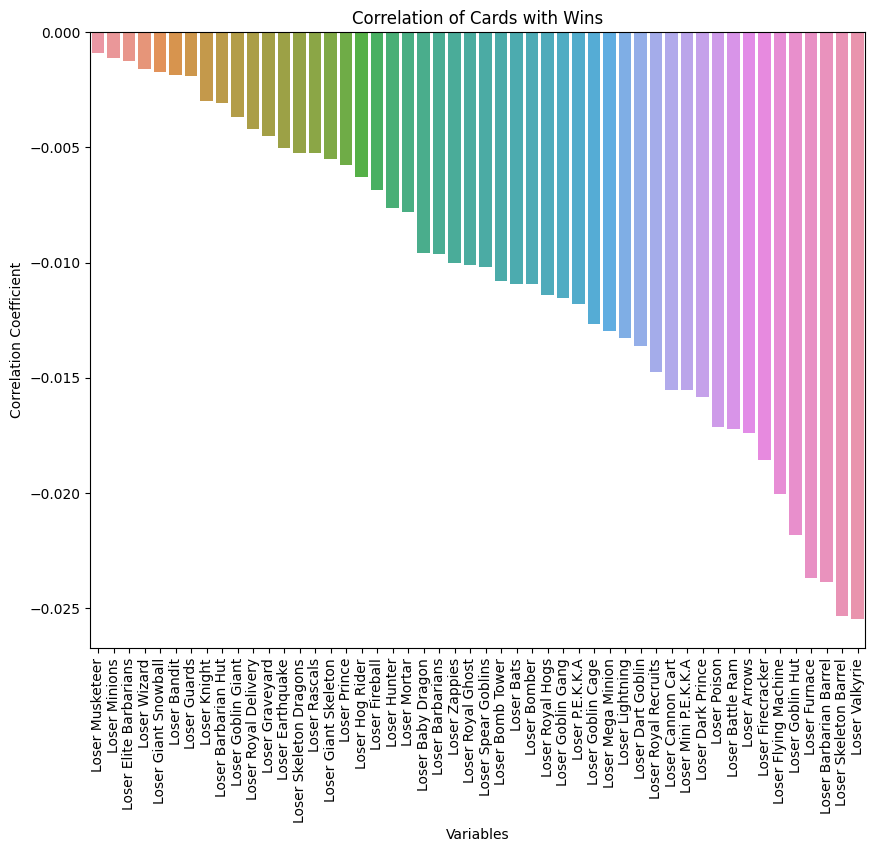

In [ ]:
bottom_lose = correlations_sorted.iloc[-50:]
plt.figure(figsize=(10, 8))
sns.barplot(x=bottom_lose.index, y=bottom_lose.values)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title(f'Correlation of Cards with {variable_of_interest}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Here are the losing deck cards that are least correlated with win magnitude. These are the cards that are the most successful for the losers.

In [ ]:
corr_pairs = lose_corr.unstack().reset_index()
corr_pairs.columns = ['Card1', 'Card2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Card1'] < corr_pairs['Card2']]
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
sorted_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)
sorted_pairs = sorted_pairs.drop('AbsCorrelation', axis=1)

In [ ]:
sorted_pairs.head(15)

,Card1,Card2,Correlation
975,Loser Golem,Loser Night Witch,0.553976
7351,Loser Cannon,Loser Ice Golem,0.441196
3924,Loser Ice Golem,Loser Skeletons,0.375868
8010,Loser Tesla,Loser X-Bow,0.374244
3758,Loser Battle Ram,Loser Royal Ghost,0.370061
4774,Loser Bandit,Loser Battle Ram,0.355636
3100,Loser Ice Spirit,Loser Skeletons,0.352654
8987,Loser Goblin Barrel,Loser Princess,0.351206
7343,Loser Cannon,Loser Ice Spirit,0.348203
7323,Loser Cannon,Loser Skeletons,0.343791


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d7d656a-1712-42ea-b8d4-bc2aecbb225b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>